<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2
from PIL import Image

%matplotlib inline

In [0]:
import os
# Directory with our angry pictures
angry_dir = os.path.join('drive/My Drive/Emotion Regognition/Angry')

# Directory with our happy pictures
happy_dir = os.path.join('drive/My Drive/Emotion Regognition/Happy')

# Directory with our sad pictures
sad_dir = os.path.join('drive/My Drive/Emotion Regognition/Sad')

In [0]:
dataset = []
label = []

Converting angry images into an array of shape(64,64) with 3 channels and generate labels for each corresponding image as 0 - for angry images

In [8]:
os.listdir(angry_dir)

['warning-2284170__340.jpg',
 'young-3061646__340.jpg',
 'portrait-2006207__340.jpg',
 'man-921004__340.jpg',
 'oliver-kahn-406393__340.jpg',
 'furious-2514031__340.jpg',
 'burmeseboy-2312416__340.jpg',
 'crazy-3126441__340.jpg',
 'boy-509488__340.jpg',
 'black-3527812__340.jpg',
 'angry-man-274175__340.jpg',
 'angry-3126438__340.jpg',
 'angry-3126437__340.jpg',
 'annoyed-3126442__340.jpg',
 'basketball-630515__340.jpg',
 'angry-1256467__340.jpg',
 'anger-18615__340.jpg',
 'anger-1221910__340.jpg',
 'anger-19063__340.jpg',
 '240_F_74212224_x2l9oGLKfTOiWzfeWQ8TTh8VE6fTiN8V.jpg']

In [0]:
angry_images = os.listdir(angry_dir)
for i, image_name in enumerate(angry_images):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image = cv2.imread(angry_dir+"/"+image_name)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image)
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

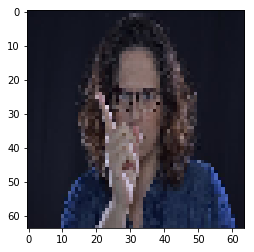

In [21]:
plt.imshow(dataset[0])

Converting happy images into an array of shape(64,64) with 3 channels and generate labels for each corresponding image as 1 - for angry images

In [17]:
os.listdir(happy_dir)

['young-1822656__340.jpg',
 'woman-1031000__340.jpg',
 'smile-2072907__340.jpg',
 'girl-657753__340.jpg',
 'girl-872149__340.jpg',
 'happy-1836445__340.jpg',
 'girl-204327__340.jpg',
 'girl-1403458__340.jpg',
 'girl-1039532__340.jpg',
 'couple-1838940__340.jpg',
 'beauty-1721069__340.jpg',
 'beauty-354565__340.jpg',
 'child-476506__340.jpg',
 'child-476507__340.jpg',
 'business-woman-2697954__340.jpg',
 'baby-390555__340.jpg',
 'beautiful-1274361__340.jpg',
 'beautiful-1867431__340.jpg',
 'africa-1854308__340.jpg',
 'actress-2868705__340.jpg']

In [0]:
happy_images = os.listdir(happy_dir)
for i, image_name in enumerate(happy_images):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image = cv2.imread(happy_dir+"/"+image_name)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image)
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

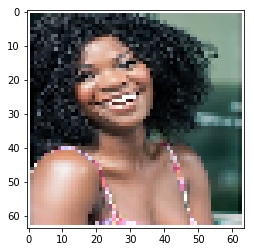

In [23]:
plt.imshow(dataset[22])

Converting sad images into an array of shape(64,64) with 3 channels and generate labels for each corresponding image as 2 - for angry images

In [24]:
os.listdir(sad_dir)

['robot-3010309__340.jpg',
 'retouching-2572963__340.jpg',
 'people-2566201__340.jpg',
 '240_F_129336049_uuvnEwSPDm5Fk0Vw7J0noKPOyHuQ1VTm.jpg',
 '240_F_17281255_1iTNXhiJGg2wSmG2A446WMyip0uoZXYR.jpg',
 '240_F_139321974_RpU5S3tDoVIDlOjUQuth8xjVEiBRVkJm.jpg',
 'attractive-1867127__340.jpg',
 'mary-pickford-1963155__340.jpg',
 'man-1465525__340.jpg',
 '240_F_167693320_fMID820wy2RaOtysponbKEL9cMFpotqJ.jpg',
 '240_F_11185020_7zl5kfMfr0OOMduPEs3JOmPtB31jbxnZ.jpg',
 'woman-71735__340.jpg',
 'young-people-412041__340.jpg',
 'woman-2345037__340.jpg',
 'sad-219722__340.jpg',
 'sadness-1325507__340.jpg',
 'sad-girl-1382940__340.jpg',
 'war-2545307__340.jpg',
 'upset-3061663__340.jpg',
 'sad-217252__340.jpg']

In [0]:
sad_images = os.listdir(sad_dir)
for i, image_name in enumerate(sad_images):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image = cv2.imread(sad_dir+"/"+image_name)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image)
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(2)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

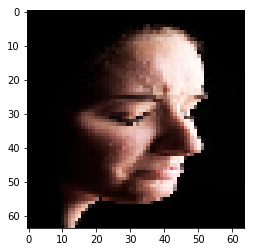

In [27]:
plt.imshow(dataset[44])

In [0]:
dataset[0].shape

In [28]:
X = np.array(dataset)
print(X.shape)

(60, 64, 64, 3)


In [29]:
Y= np.array(label)
Y.shape

(60,)

Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
# Split data into train/test = 80%/20%
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [31]:
print(X_train.shape)
print(X_test.shape)

(48, 64, 64, 3)
(12, 64, 64, 3)


In [0]:
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.daYtasets.mnist import read_data_sets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [223]:
batch_size = 100
learning_rate = 0.005
evaluation_size = 500
image_width = X_train[0].shape[0]
image_height = X_train[0].shape[1]
target_size = max(Y) + 1
num_channels = 3 # COLOURED IMAGES
print(image_width,image_height,target_size)
num_channels = 3 # COLOURED IMAGES
generations = 500
eval_every = 5
#
conv1_features = 64 #number of neurons in conv layer 1
conv2_features = 128  #number of neurons in conv layer 2
conv3_features = 256  #number of neurons in conv layer 3
conv4_features = 512  #number of neurons in conv layer 4
conv5_features = 1024  #number of neurons in conv layer 5
#
max_pool_size1 = 2 # NxN window for 1st max pool layer
max_pool_size2 = 2 # NxN window for 2nd max pool layer
max_pool_size3 = 2 # NxN window for 3rd max pool layer
max_pool_size4 = 2 # NxN window for 4th max pool layer
max_pool_size5 = 2 # NxN window for 5th max pool layer
#
fully_connected_size1 = 100

64 64 3


In [209]:
target_size

3

In [0]:
x_input_shape = (batch_size, image_width, image_height, num_channels)
x_input = tf.placeholder(tf.float32, shape=x_input_shape)

y_target = tf.placeholder(tf.int32, shape=(batch_size))

eval_input_shape = (evaluation_size, image_width, image_height, num_channels)

eval_input = tf.placeholder(tf.float32, shape=eval_input_shape)

eval_target = tf.placeholder(tf.int32, shape=(evaluation_size))

In [0]:
conv1_weight = tf.Variable(tf.truncated_normal([4, 4, num_channels, conv1_features],
                                               stddev=0.1, dtype=tf.float32))
conv1_bias = tf.Variable(tf.zeros([conv1_features], dtype=tf.float32))

#
conv2_weight = tf.Variable(tf.truncated_normal([4, 4, conv1_features, conv2_features],
                                               stddev=0.1, dtype=tf.float32))
conv2_bias = tf.Variable(tf.zeros([conv2_features], dtype=tf.float32))

#
conv3_weight = tf.Variable(tf.truncated_normal([4, 4, conv2_features, conv3_features],
                                               stddev=0.1, dtype=tf.float32))
conv3_bias = tf.Variable(tf.zeros([conv3_features], dtype=tf.float32))

#
conv4_weight = tf.Variable(tf.truncated_normal([4, 4, conv3_features, conv4_features],
                                               stddev=0.1, dtype=tf.float32))
conv4_bias = tf.Variable(tf.zeros([conv4_features], dtype=tf.float32))

#
conv5_weight = tf.Variable(tf.truncated_normal([4, 4, conv4_features, conv5_features],
                                               stddev=0.1, dtype=tf.float32))
conv5_bias = tf.Variable(tf.zeros([conv5_features], dtype=tf.float32))

In [0]:
# fully connected variables
resulting_width = image_width // (max_pool_size1 * max_pool_size2 * max_pool_size3 *max_pool_size4 *max_pool_size5)
resulting_height = image_height // (max_pool_size1 * max_pool_size2 * max_pool_size3 *max_pool_size4 *max_pool_size5)

full1_input_size = resulting_width * resulting_height * conv5_features

full1_weight = tf.Variable(tf.truncated_normal([full1_input_size, fully_connected_size1],
                          stddev=0.1, dtype=tf.float32))
full1_bias = tf.Variable(tf.truncated_normal([fully_connected_size1], stddev=0.1, dtype=tf.float32))
#
full2_weight = tf.Variable(tf.truncated_normal([fully_connected_size1, target_size],
                                               stddev=0.1, dtype=tf.float32))
full2_bias = tf.Variable(tf.truncated_normal([target_size], stddev=0.1, dtype=tf.float32))

In [0]:
def my_conv_net(input_data):
    # First Conv-ReLU-MaxPool Layer
    conv1 = tf.nn.conv2d(input_data, conv1_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu1 = tf.nn.relu(tf.nn.bias_add(conv1, conv1_bias))
    max_pool1 = tf.nn.max_pool(relu1, ksize=[1, max_pool_size1, max_pool_size1, 1],
                               strides=[1, max_pool_size1, max_pool_size1, 1], padding='SAME')

    # Second Conv-ReLU-MaxPool Layer
    conv2 = tf.nn.conv2d(max_pool1, conv2_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu2 = tf.nn.relu(tf.nn.bias_add(conv2, conv2_bias))
    max_pool2 = tf.nn.max_pool(relu2, ksize=[1, max_pool_size2, max_pool_size2, 1],
                               strides=[1, max_pool_size2, max_pool_size2, 1], padding='SAME')
    
    # Third Conv-ReLU-MaxPool Layer
    conv3 = tf.nn.conv2d(max_pool2, conv3_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu3 = tf.nn.relu(tf.nn.bias_add(conv3, conv3_bias))
    max_pool3 = tf.nn.max_pool(relu3, ksize=[1, max_pool_size3, max_pool_size3, 1],
                               strides=[1, max_pool_size3, max_pool_size3, 1], padding='SAME')
    
    # Fourth Conv-ReLU-MaxPool Layer
    conv4 = tf.nn.conv2d(max_pool3, conv4_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu4 = tf.nn.relu(tf.nn.bias_add(conv4, conv4_bias))
    max_pool4 = tf.nn.max_pool(relu4, ksize=[1, max_pool_size4, max_pool_size4, 1],
                               strides=[1, max_pool_size4, max_pool_size4, 1], padding='SAME')

    # Fifth Conv-ReLU-MaxPool Layer
    conv5 = tf.nn.conv2d(max_pool4, conv5_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu5 = tf.nn.relu(tf.nn.bias_add(conv5, conv5_bias))
    max_pool5 = tf.nn.max_pool(relu5, ksize=[1, max_pool_size5, max_pool_size5, 1],
                               strides=[1, max_pool_size5, max_pool_size5, 1], padding='SAME')

    # Transform Output into a 1xN layer for next fully connected layer
    final_conv_shape = max_pool5.get_shape().as_list()
    final_shape = final_conv_shape[1] * final_conv_shape[2] * final_conv_shape[3]
    flat_output = tf.reshape(max_pool5, [final_conv_shape[0], final_shape])

    # First Fully Connected Layer
    fully_connected1 = tf.nn.relu(tf.add(tf.matmul(flat_output, full1_weight), full1_bias))

    # Second Fully Connected Layer
    final_model_output = tf.add(tf.matmul(fully_connected1, full2_weight), full2_bias)
    
    return(final_model_output)

In [0]:
model_output = my_conv_net(x_input)
test_model_output = my_conv_net(eval_input)

In [0]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = model_output,labels = y_target))

In [0]:
my_optimizer = tf.train.MomentumOptimizer(learning_rate, 0.9)
train_step = my_optimizer.minimize(loss)


In [0]:
prediction = tf.nn.softmax(model_output)
test_prediction = tf.nn.softmax(test_model_output)

In [0]:
def get_accuracy(logits, targets):
    batch_predictions = np.argmax(logits, axis=1)
    num_correct = np.sum(np.equal(batch_predictions, targets))
    return(100. * num_correct/batch_predictions.shape[0])

In [0]:
sess = tf.Session()

In [0]:
init = tf.global_variables_initializer()
sess.run(init)

In [235]:
train_loss = []
train_acc = []
test_acc = []
for i in range(generations):
    rand_index = np.random.choice(len(X_train), size=batch_size)
    rand_x = X_train[rand_index]
    #rand_x = np.expand_dims(rand_x, 3)
    rand_y = y_train[rand_index]
    train_dict = {x_input: rand_x, y_target: rand_y}
    
    sess.run(train_step, feed_dict=train_dict)
    temp_train_loss, temp_train_preds = sess.run([loss, prediction], feed_dict=train_dict)
    temp_train_acc = get_accuracy(temp_train_preds, rand_y)
    
    if (i+1) % eval_every == 0:
        eval_index = np.random.choice(len(X_test), size=evaluation_size)
        eval_x = X_test[eval_index]
        #eval_x = np.expand_dims(eval_x, 3)
        eval_y = y_test[eval_index]
        test_dict = {eval_input: eval_x, eval_target: eval_y}
        test_preds = sess.run(test_prediction, feed_dict=test_dict)
        temp_test_acc = get_accuracy(test_preds, eval_y)
        
        # Record and print results
        train_loss.append(temp_train_loss)
        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)
        acc_and_loss = [(i+1), temp_train_loss, temp_train_acc, temp_test_acc]
        acc_and_loss = [np.round(x,2) for x in acc_and_loss]
        print('Generation # {}. Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))

Generation # 5. Train Loss: nan. Train Acc (Test Acc): 36.00 (6.60)
Generation # 10. Train Loss: nan. Train Acc (Test Acc): 46.00 (7.20)
Generation # 15. Train Loss: nan. Train Acc (Test Acc): 31.00 (7.80)
Generation # 20. Train Loss: nan. Train Acc (Test Acc): 41.00 (8.20)
Generation # 25. Train Loss: nan. Train Acc (Test Acc): 30.00 (9.20)
Generation # 30. Train Loss: nan. Train Acc (Test Acc): 39.00 (7.60)
Generation # 35. Train Loss: nan. Train Acc (Test Acc): 43.00 (5.80)
Generation # 40. Train Loss: nan. Train Acc (Test Acc): 39.00 (8.20)
Generation # 45. Train Loss: nan. Train Acc (Test Acc): 39.00 (7.20)
Generation # 50. Train Loss: nan. Train Acc (Test Acc): 38.00 (5.80)
Generation # 55. Train Loss: nan. Train Acc (Test Acc): 35.00 (9.40)
Generation # 60. Train Loss: nan. Train Acc (Test Acc): 37.00 (8.40)
Generation # 65. Train Loss: nan. Train Acc (Test Acc): 29.00 (7.00)
Generation # 70. Train Loss: nan. Train Acc (Test Acc): 44.00 (8.40)
Generation # 75. Train Loss: nan. T